Algoritmos Genéticos y Optimización Heurística - UTN-FRT
# **Trabajo Práctico N°2 - Opcional**
##**Tema**: Simulated Annealing##

El siguiente código es una implementación simple del algoritmo Simulated Annealing, donde la función “probabilidad“ se encarga de calcular la probabilidad de tomar una solución mala de todas formas. Se pide completar el código donde corresponda.

In [ ]:
import random
import math

def SimulatedAnnealing(fitness, X_mejor, max_eps, bounds, cant_iterac, T0, mu):
    """Método de optimización Simulated Annealing
    PARAMETROS
    fitness : function
        Funcion de evaluacion a optimizar
    X_mejor: list
        Vector solucion inicial, desde donde parte la exploracion.
    max_eps: float
        Valor de distancia maxima del paso a recorrer en cada iteracion.
    bounds: list(tuple)
        Matriz de tamano nx2, donde n es la cantidad de variables que 
        tiene el problema (cantidad de coordenadas del vector solución). 
        En la primera columna se establecen los valores limites inferiores y 
        en la segunda columna se establece los valores limite superiores.
        Observen que los valores de la primera columna siempre deben ser 
        menores que los de la segunda).
    cant_iterac: integer
        Cantidad de iteraciones usada como condicion de terminacion.
    T0: float
        temperatura inicial (depende de los valores de fitness).
    mu: float
        factor que controla la forma de la función de enfriamiento.
    RETORNO
    X_mejor : list
        Vector solución correspondiente a la mejor solución encontrada.
    fX_mejor : list
        Valor de evaluación de la mejores solución encontrada.
    Trace_R : list
        Lista con los vectores dirección calculados en cada iteración.
    Trace_X : list
        Lista con las soluciones calculadas en cada iteración.
    Trace_X_mejor : list
        Lista con las mejores soluciones de cada iteración.
    Trace_f : list
        Lista con los valores de evaluación de la mejor y peor solución.
    """
    fX_mejor = 0
    Trace_R = []
    Trace_X = []
    Trace_X_mejor = []
    Trace_f = []
    if len(X_mejor) == 0:
        print ('La solucion inicial debe tener al menos una variable.')
        return X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f
    if len(bounds) != len(X_mejor) or len(bounds[0]) != 2:
        print('La matriz de Bounds tiene un tamaño incorrecto.')
        return X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f
    if cant_iterac < 1:
        print('El número máximo de iteraciones debe ser positivo mayor a cero.')
        return X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f
    if T0 <= 0:
        print('La temperatura inicial debe ser positiva.')
        return X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f
    if max_eps <= 0:
        print('El tamaño del paso debe ser real y positivo.')
        return X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f
    # evaluacion inicial 
    fX_mejor = fitness(X_mejor)
    fX_best = fX_mejor
    T = T0;
    # inicializar variables
    Trace_R.append([0 for xi in X_mejor]);
    Trace_X.append(X_mejor);
    Trace_X_mejor.append(X_mejor);
    Trace_f.append((fX_mejor,fX_mejor))
    it = 0
    cnt = 0
    sigue = True
    # repetir hasta que se cumpla la condicion de terminacion
    while sigue:
        # temperatura actual
        T = temperaturaSA(it, T0, mu)
        #  calculo el punto de exploracion
        X, R = puntoExploracion(X_mejor, max_eps)
        # verifico y corrijo que X este dentro del dominio
        for i in range(len(X)):
            X[i] = bounds[i][0] if X[i] < bounds[i][0] else X[i]
            X[i] = bounds[i][1] if X[i] > bounds[i][1] else X[i]
        # evaluo solucion
        fX0 = fX_mejor
        fX = fitness(X)
        #si la solucion actual es mejor que la que ya tenía
        if fX >= fX_mejor:
            X_mejor = X
            fX_mejor = fX
            cnt = 0
        else:
            cnt = cnt + 1
            #tiro una moneda para saber si acepto la solucion de todas formas
            p = probabilidadSA(fX, fX_mejor, T)

            if random.random() < p:
              X_mejor = X
              fX_mejor = fX
              cnt = 0
            else:
              cnt = cnt + 1

        # guardo valores para analisis posterior
        Trace_R.append(R)
        Trace_X.append(X)
        Trace_X_mejor.append(X_mejor)
        Trace_f.append((max(fX, fX0), min(fX, fX0)))
        # condicion de terminacion
        if cnt > cant_iterac:
            sigue = False
        # incremento el tiempo
        it = it + 1
        # imprimir solo si obtuve una mejor solucion
        if fX >= fX0:
            print("It.{0}: {1} -> {2}".format(it, 
                [round(xi,2) for xi in X], round(fX_mejor,4)))
    return X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f

def temperaturaSA(i, T0, mu):
    """Calcular la temperatura en la iteración "i" del algoritmo SA.
    PARAMETROS
    i: integer
        Numero de iteración actual del algoritmo.
    T0: float
        Temperatura inicial con la que inició el procedimiento.
    mu: float
        Coeficiente de enfriamiento.
    RETORNO
    T: float
        Valor de temepratura
    """
    T = T0*math.exp(-mu*i)
    return T

def probabilidadSA(fX, fX_mejor, T):
    """Calcular la probabilidad para tomar una solucion mala en Simulated Annealing.
    PARAMETROS
    fX: float
        Valor de fitness de la solución generada.
    fX_mejor: float
        Valor de fitness de la solución previa que es mejor que la generada.
        Es decir, se cumple que fX < fX_mejor
    T: float
        Valor de temperatura actual.
    """
    return math.exp((fX - fX_mejor) / T)

def puntoExploracion(X0, max_eps):
    """Calcular un nuevo punto de exploración o solución, a partir de
    una solución previa.

    PARAMETROS
    X0: list
        Vector solucion inicial.
    max_eps: float
        Valor del tamaño máximo del paso.
    
    RETORNO
    X : list
        Vector solución generado.
    R : list
        Vector dirección.
    """
    R1 = [2*random.random()-1 for i in range(len(X0))]
    norma = math.sqrt(sum([ri**2 for ri in R1]))
    R = [ri/norma for ri in R1]
    e = random.random()*max_eps
    X = []
    for i in range(len(X0)):
      X.append(X0[i]+e*R[i])
    return X, R

## Ejercicio 2
Compruebe el funcionamiento del algoritmo, buscando un óptimo local en los siguientes casos:

1. F(x, y) = -x^2 - y^2, x,y ∈ [-5, 5]
2. g(x)= -0.01 x^2-cos(2x), x ∈ [-4𝜋, 4𝜋]
3. G(x, y) = -0.01 (x^2+y^2)-cos(2x)-cos(2y), x,y ∈ [-4𝜋, 4𝜋]

En cada caso se pide:
* Ajuste adecuadamente todos los parámetros del algoritmo, de manera de asegurar que encuentre el óptimo **global** (o un óptimo local cercano al global) independientemente de cuál sea el punto inicial, en más del 80% de las ejecuciones. Considere dos cifras decimales de precisión para determinar que llegó al óptimo.
* Genere un gráfico con la “caminata” realizada, es decir donde se muestre todos los puntos por donde el algoritmo fue explorando, desde el punto inicial hasta llegar a la solución final.
* Generar un gráfico con los valor de fitness de las soluciones encontradas en cada iteración del algoritmo.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
def graficarEvolucionFitness(trace_f):
    """Método para graficar la evolucion del fitness con las iteraciones.
    PARAMETROS
    trace_f : list
        Lista con los valores de evaluación de la mejor y peor solución.
    """
    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(0, 10, 1000)
    x = [i for i in range(len(trace_f))];
    best = [t[0] for t in trace_f];
    worst = [t[1] for t in trace_f];
    plt.plot(x, best, label='Mejor solución');
    plt.plot(x, worst, label='Peor solución');
    # Add title and axis names
    plt.title('Valores de Evaluación')
    plt.xlabel('Iteración')
    plt.ylabel('Fitness')
    plt.grid()
    plt.legend()

def graficarTemperatura(T0, mu, cant_iterac):
    """Graficar funcion de enfriamiento."
    PARAMETROS
    T0: float
        Temperatura inicial
    mu: float
        Coeficiente de enfriamiento
    cant_itera: int
        Cantidad total de iteraciones.
    """
    fig = plt.figure()
    ax = fig.gca()
    X = []; Y = []
    for i in range(cant_iterac):
        T = temperaturaSA(i, T0, mu)
        X.append(i)
        Y.append(T)
    # Plot the line.
    plt.plot(X, Y, antialiased=False)
    # Add title and axis names
    plt.title('Función de TemperaturaEvaluación')
    plt.xlabel('T')
    plt.ylabel('T(t)')
    plt.grid()

def graficarCaminata(fitness, solutions,  bounds, resolution, alpha=0.5):
    """Graficar la funcion de evaluacion y las soluciones encontradas.
    PARAMETROS
    fitness : function
        Función de evaluación a optimizar
    solutions : list
        Lista de soluciones encontradas con método de optimización.
    bounds: list(tuple)
        Matriz de tamano nx2, donde n es la cantidad de variables que 
        tiene el problema (cantidad de coordenadas del vector solución). 
    resolution : float
        Resolución para graficar la función. Tomar un valor Mayor a 0.1.
    alpha : float
        Transparencia para el grafico de la función.
    """
    if len(bounds) == 1:
        fig = plt.figure()
        ax = fig.gca()
        ranges = []
        for i in range(len(bounds)):
            steps = round((bounds[i][1] - bounds[i][0]) / resolution)
            ranges.append([bounds[i][0] + s*resolution for s in range(steps)])
        X = []; Y = []
        for i, xi in enumerate(ranges[0]):
            X.append(xi)
            Y.append(fitness([xi]))
        # Plot the line.
        plt.plot(X, Y, antialiased=False, alpha=alpha)
        # Add title and axis names
        plt.title('Función de Evaluación')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid()
        x = [s[0] for s in solutions]
        y = [fitness(s) for s in solutions]
        ax.scatter(x, y, c='k', marker='o')
    elif len(bounds) == 2:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ranges = []
        for i in range(len(bounds)):
            steps = round((bounds[i][1] - bounds[i][0]) / resolution)
            ranges.append([bounds[i][0] + s*resolution for s in range(steps)])
        X = []; Y = []; Z = []
        for i, xi in enumerate(ranges[0]):
            x_row = []; y_row = []; z_row = []
            for j, yj in enumerate(ranges[1]):
                x_row.append(xi)
                y_row.append(yj)
                z_row.append(fitness([xi, yj]))
            X.append(x_row)
            Y.append(y_row)
            Z.append(z_row)
        # Plot the surface.
        surf = ax.plot_surface(X, Y, np.array(Z), cmap=cm.coolwarm, linewidth=0, 
            antialiased=False, alpha=alpha)
        # Add title and axis names
        plt.title('Función de Evaluación')
        plt.xlabel('x')
        plt.ylabel('y')
        ax.set_zlabel('f(x,y)')
        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=5)
        x = [s[0] for s in solutions]
        y = [s[1] for s in solutions]
        z = [fitness(s)+1 for s in solutions]
        ax.scatter(x, y, z, c='k', marker='o')
        ax.view_init(elev=40., azim=60)
    else: 
        print("No implementado para más de dos variables.")

It.1: [4.98, 5] -> -49.7888
It.2: [4.93, 4.97] -> -48.9875
It.4: [4.84, 5] -> -48.4489
It.5: [4.84, 4.99] -> -48.2501
It.7: [4.71, 4.97] -> -46.8433
It.9: [4.61, 5] -> -46.2562
It.10: [4.55, 4.92] -> -44.9161
It.11: [4.51, 4.9] -> -44.3161
It.12: [4.36, 4.96] -> -43.6686
It.17: [4.31, 5] -> -43.6152
It.18: [4.3, 4.88] -> -42.3135
It.20: [4.29, 4.88] -> -42.2465
It.27: [4.38, 4.76] -> -41.8683
It.31: [4.32, 4.77] -> -41.4758
It.33: [4.31, 4.62] -> -39.9202
It.34: [4.31, 4.58] -> -39.55
It.36: [4.2, 4.54] -> -38.214
It.41: [4.18, 4.42] -> -37.0261
It.42: [4.08, 4.49] -> -36.8691
It.43: [3.97, 4.56] -> -36.5572
It.44: [3.97, 4.56] -> -36.5434
It.48: [3.93, 4.39] -> -34.6912
It.49: [3.77, 4.43] -> -33.8585
It.51: [3.71, 4.47] -> -33.6878
It.53: [3.78, 4.36] -> -33.2991
It.54: [3.73, 4.39] -> -33.2292
It.55: [3.84, 4.24] -> -32.7659
It.59: [3.86, 4.17] -> -32.2797
It.65: [3.78, 4.17] -> -31.6505
It.66: [3.87, 4.04] -> -31.3368
It.67: [3.81, 3.85] -> -29.3701
It.69: [3.64, 3.91] -> -28.545
I

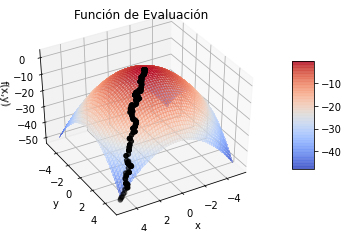

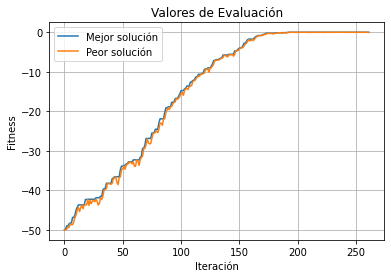

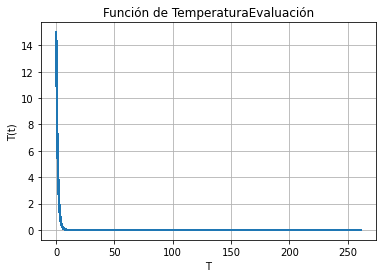

In [ ]:
import math

def f(X_vars):
    return -sum( [xi**2 for xi in X_vars] )

bounds_F = [(-5,5), (-5,5)]

# punto inicial en una de las esquinas
x0 = [row[1] for row in bounds_F] 

### COMPLETAR CÓDIGO ####
#tamaño máximo del paso
max_eps = 0.2
#cantidad de iteraciones para la condicion de temrinación
cant_iterac = 50
#temperatura inicial (depende de los valores de fitness en el problema)
T0 = 15
#coeficiente de enfriamiento (controla que tan rápido se 'enfria' el algoritmo)
mu = 0.8
###

X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f = SimulatedAnnealing(
    f, x0, max_eps, bounds_F, cant_iterac, T0, mu)
print("-----")
print("Solución: {0}".format(X_mejor))
print("Fitness: {0}".format(fX_mejor))
print("Iteraciones: {0}".format(len(Trace_X)-1))
graficarCaminata(f, Trace_X_mejor, bounds_F, 0.1)
graficarEvolucionFitness(Trace_f)
graficarTemperatura(T0, mu, len(Trace_f))

It.1: [12.39] -> -2.4697
It.2: [12.13] -> -2.1203
It.4: [11.72] -> -1.257
It.6: [11.48] -> -0.7577
It.8: [12.57] -> -2.5791
It.9: [12.57] -> -2.5791
It.10: [12.57] -> -2.5791
It.11: [12.57] -> -2.5791
It.12: [12.06] -> -1.9765
It.15: [12.57] -> -2.5791
It.16: [11.38] -> -0.5692
It.18: [10.67] -> -0.3461
It.20: [11.15] -> -0.2879
It.21: [10.93] -> -0.2032
It.23: [11.19] -> -0.3271
It.28: [11.19] -> -0.3273
It.30: [10.54] -> -0.5045
It.31: [11.31] -> -0.4657
It.34: [12.57] -> -2.5791
It.35: [12.57] -> -2.5791
It.36: [11.6] -> -0.9974
It.37: [10.79] -> -0.2464
It.40: [10.67] -> -0.3383
It.42: [10.92] -> -0.2039
It.46: [11.84] -> -1.528
It.48: [10.79] -> -0.246
It.50: [10.95] -> -0.2032
It.53: [12.57] -> -2.5791
It.54: [11.3] -> -0.4561
It.55: [10.88] -> -0.2097
It.57: [10.59] -> -0.4303
It.61: [12.45] -> -2.5245
It.63: [11.67] -> -1.1389
It.64: [10.57] -> -0.4601
It.66: [10.71] -> -0.3093
It.69: [11.24] -> -0.3782
It.71: [10.77] -> -0.2574
It.75: [10.78] -> -0.2508
It.78: [11.29] -> -0.44

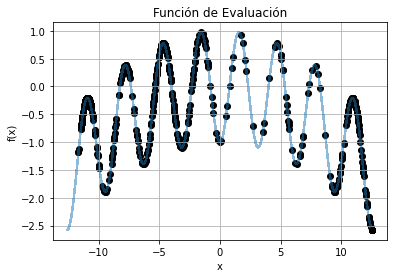

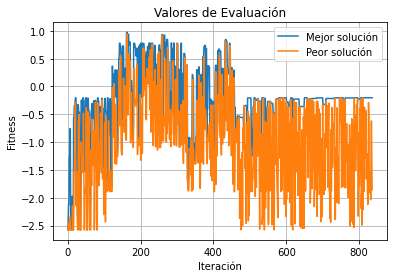

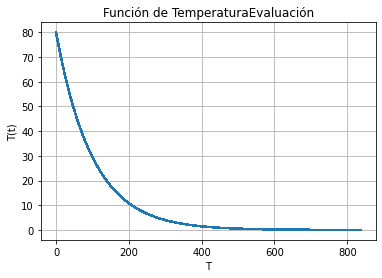

In [ ]:
import math

def g(X_vars):
    return -0.01 * sum([xi**2 for xi in X_vars]) - sum([math.cos(2*xi) for xi in X_vars])

bounds_g = [(-4*math.pi, 4*math.pi)]

# punto inicial en una de las esquinas
x0 = [row[1] for row in bounds_g]

### COMPLETAR CÓDIGO ####
#tamaño máximo del paso
max_eps = 1.5
#cantidad de iteraciones para la condicion de temrinación
cant_iterac = 50
#temperatura inicial (depende de los valores de fitness en el problema)
T0 = 80
#coeficiente de enfriamiento (controla que tan rápido se 'enfria' el algoritmo)
mu = 0.01
###

X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f = SimulatedAnnealing(
    g, x0, max_eps, bounds_g, cant_iterac, T0, mu)
print("-----")
print("Solución: {0}".format(X_mejor))
print("Fitness: {0}".format(fX_mejor))
print("Iteraciones: {0}".format(len(Trace_X)-1))
graficarCaminata(g, Trace_X_mejor, bounds_g, 0.1)
graficarEvolucionFitness(Trace_f)
graficarTemperatura(T0, mu, len(Trace_f))

It.1: [12.57, 12.57] -> -5.1583
It.2: [12.57, 12.57] -> -5.1583
It.3: [12.57, 12.57] -> -5.1583
It.4: [11.79, 12.57] -> -3.9785
It.5: [11.65, 11.91] -> -2.7833
It.7: [10.94, 12.57] -> -2.7821
It.9: [9.05, 11.18] -> -1.8666
It.10: [8.63, 11.19] -> -1.0489
It.14: [8.01, 12.57] -> -2.2711
It.16: [8.21, 12.57] -> -2.5002
It.18: [8.51, 12.57] -> -3.0428
It.20: [8.74, 12.57] -> -3.5336
It.22: [8.03, 12.57] -> -2.2894
It.23: [7.75, 12.57] -> -2.2022
It.25: [8.03, 12.35] -> -2.1429
It.26: [8.07, 12.29] -> -2.1048
It.28: [7.23, 11.15] -> -0.5041
It.32: [6.31, 8.31] -> -1.4804
It.33: [5.19, 7.05] -> -0.2208
It.36: [5.46, 7.16] -> -0.5586
It.38: [5.44, 7.14] -> -0.5532
It.40: [6.82, 6.09] -> -2.2323
It.41: [7.01, 6.45] -> -1.9634
It.42: [8.57, 7.2] -> -0.8704
It.45: [7.78, 7.98] -> 0.7181
It.47: [7.54, 7.39] -> 0.2912
It.50: [7.49, 7.48] -> 0.3614
It.51: [8.01, 8.1] -> 0.5317
It.53: [9.74, 10.2] -> -2.8184
It.54: [9.6, 10.72] -> -2.1534
It.55: [11.17, 10.6] -> -0.7348
It.57: [12.5, 9.94] -> -4.05

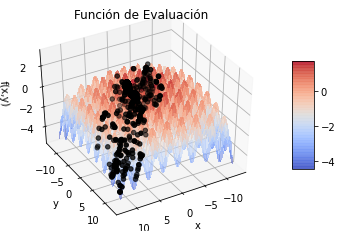

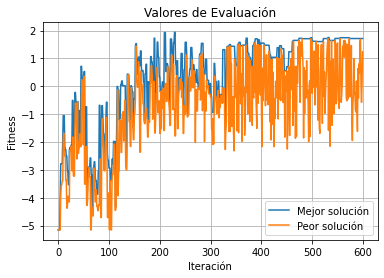

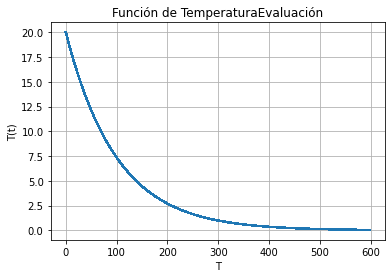

In [ ]:
import math

def g(X_vars):
    return -0.01 * sum([xi**2 for xi in X_vars]) - sum([math.cos(2*xi) for xi in X_vars])

bounds_G = [(-4*math.pi, 4*math.pi) for i in range (2)]

# punto inicial en una de las esquinas
x0 = [row[1] for row in bounds_G]

### COMPLETAR CÓDIGO ####
#tamaño máximo del paso
max_eps = 2
#cantidad de iteraciones para la condicion de temrinación
cant_iterac = 50
#temperatura inicial (depende de los valores de fitness en el problema)
T0 = 20
#coeficiente de enfriamiento (controla que tan rápido se 'enfria' el algoritmo)
mu = 0.01
###

X_mejor, fX_mejor, Trace_R, Trace_X, Trace_X_mejor, Trace_f = SimulatedAnnealing(
    g, x0, max_eps, bounds_G, cant_iterac, T0, mu)
print("-----")
print("Solución: {0}".format(X_mejor))
print("Fitness: {0}".format(fX_mejor))
print("Iteraciones: {0}".format(len(Trace_X)-1))
graficarCaminata(g, Trace_X_mejor, bounds_G, 0.1)
graficarEvolucionFitness(Trace_f)
graficarTemperatura(T0, mu, len(Trace_f))